In [30]:
#Importing all the necessary modules
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
df = pd.read_csv("./data.csv")

# 1. Exploratory Data Analysis

To make the summary more readible, let's measure weekly sales in thousands.

In [32]:
# Checking the first few rows of the dataset.
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  




**Description of the Columns:**

*Store*: the number of the store (ID).

*Date*: the week of sales.

*Weekly_Sales*: the weekly sales for the given store.

*Holiday_Flag*: whether the week is a special holiday week or not (1 = holiday week; 0 = non-holiday week).

*Temperature*: an average temperature in the region for the given week.

*Fuel_Price*: cost of fuel in the region for the given week.

*CPI*: the consumer price index for the given week.

*Unemployment*: the unemployment rate for the region for the given week.


In [33]:
# Checking for missing values.
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [34]:
#Getting basic statistics for every column except for the ID column.
df.iloc[:, 1:].describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


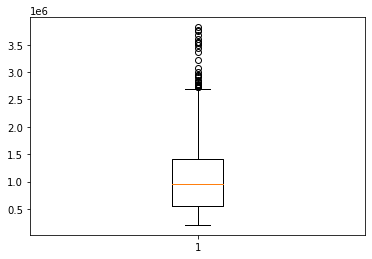

In [43]:
# Checking for outliers or unusual observations in the data
plt.boxplot(df['Weekly_Sales'])
plt.show()

The presence of numerous outliers in the data, as depicted by the boxplot, diminishes the effectiveness of the mean as a representative measure. In such cases, it is advisable to utilize a more robust measure of central tendency, such as the trimmed mean. Unlike the mean, which can be heavily influenced by extreme values, the trimmed mean mitigates the impact of outliers by excluding a predetermined proportion of the highest and lowest values from the calculation. By employing the trimmed mean, a more reliable estimate of the central tendency can be obtained, providing a better reflection of the underlying data distribution.

## 1.1 Correlation

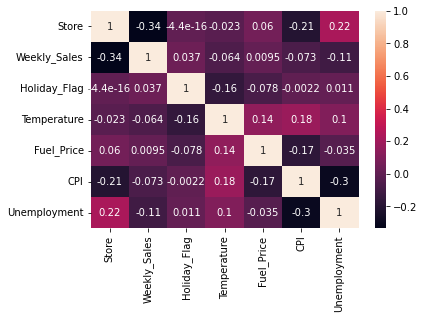

In [35]:
# Visualizing the correlation between variables to find useful relations between variables.
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Results

1. The highest correlation of 0.34 between stores and sales suggests that there may be additional factors not included in the analysis that influence sales. Potential factors could include store size, population density in the surrounding area, location, and customer income levels.

2. The second largest correlation of -0.3 between CPI (Consumer Price Index) and unemployment aligns with the economic theory known as the Phillips curve. The Phillips curve suggests an inverse relationship between inflation (as measured by CPI) and unemployment, indicating that as one increases, the other decreases.

3. Upon initial inspection, there appear to be no strong relationships between variables. However, further analysis and examination of additional variables may be necessary to uncover any hidden or subtle correlations that were not immediately apparent.

## 1.2 Sales Analysis

1. Sales in general
2. Sales by store
3. The best store
4. Test Chi na świeta